In [1]:
# -*- coding:utf-8 -*-

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
 plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
 plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [6]:
from pandas import DataFrame,Series

In [7]:
import seaborn as sns

In [8]:
%matplotlib notebook

In [9]:
pd.options.display.max_rows = 20

In [10]:
from datetime import datetime

In [11]:
 data = pd.read_table('examples/CDNOW.txt', sep='\s+', names=['会员号','购买时间','数量','商品单价'])
 data

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,会员号,购买时间,数量,商品单价
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [12]:
data[data['商品单价']==0]

,会员号,购买时间,数量,商品单价
1548,455,19970102,1,0.0
2446,713,19970103,1,0.0
3066,908,19970104,1,0.0
3118,925,19970104,1,0.0
3623,1101,19970105,1,0.0
3849,1186,19970105,1,0.0
3943,1225,19970105,1,0.0
4329,1381,19970106,1,0.0
4398,1401,19970106,1,0.0
5617,1753,19970107,1,0.0


商品销售静态分析

各订单购买数量分析

In [13]:
data['数量'].describe()

count    69659.000000
mean         2.410040
std          2.333924
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: 数量, dtype: float64

<IPython.core.display.Javascript object>


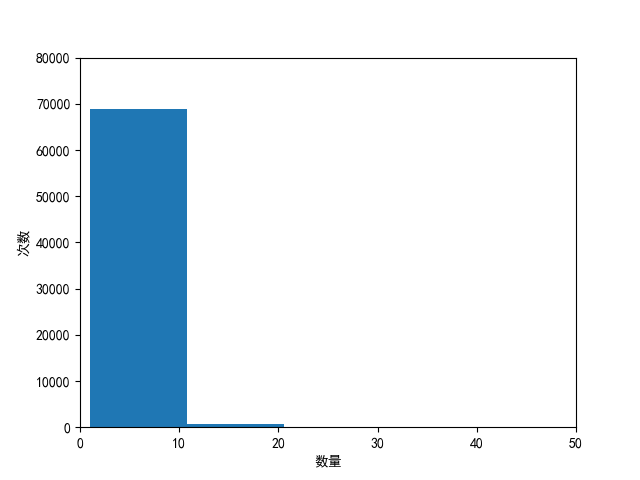

In [62]:
a1=plt.figure()

In [63]:
b1=a1.add_subplot(1,1,1)

In [66]:
data['数量'].plot.hist()

In [67]:
b1.set_xlim(0,50)
b1.set_ylim(0,80000)
b1.set_xlabel('数量')
b1.set_ylabel('次数')


Text(30.222222222222214, 0.5, '次数')

各订单 购买金额分析

In [65]:
data['商品单价'].describe()

count    69659.000000
mean        35.893648
std         36.281942
min          0.000000
25%         14.490000
50%         25.980000
75%         43.700000
max       1286.010000
Name: 商品单价, dtype: float64

<IPython.core.display.Javascript object>


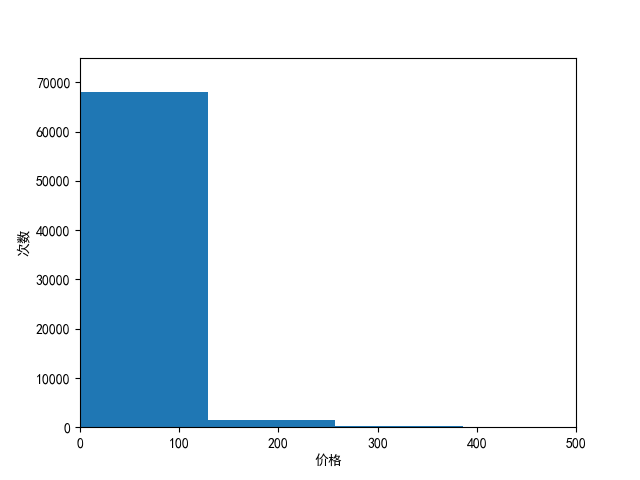

In [68]:
a2=plt.figure()

In [69]:
data['商品单价'].plot.hist()

In [70]:
b2=a2.add_subplot(1,1,1)
b2.set_xlim(0,500)
b2.set_ylim(0,75000)
b2.set_xlabel('价格')
b2.set_ylabel('次数')

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(30.222222222222214, 0.5, '次数')

2. 商品销售动态分析

（1）订单数量趋势分析

按天汇总：

In [22]:
data['购买时间'] = pd.to_datetime(data['购买时间'], format = '%Y%m%d')

In [23]:
data['购买时间']

0       1997-01-01
1       1997-01-12
2       1997-01-12
3       1997-01-02
4       1997-03-30
5       1997-04-02
6       1997-11-15
7       1997-11-25
8       1998-05-28
9       1997-01-01
           ...    
69649   1997-11-30
69650   1997-03-25
69651   1997-03-25
69652   1997-03-25
69653   1997-03-25
69654   1997-04-05
69655   1997-04-22
69656   1997-03-25
69657   1997-03-25
69658   1997-03-26
Name: 购买时间, Length: 69659, dtype: datetime64[ns]

In [24]:
data.set_index('购买时间').resample('D').sum()

,会员号,数量,商品单价
购买时间,,,
1997-01-01,26084,494,7515.35
1997-01-02,91156,530,8025.95
1997-01-03,146344,495,7475.04
1997-01-04,150310,404,6722.93
1997-01-05,276888,590,9274.80
1997-01-06,359135,620,9680.55
1997-01-07,343701,494,7741.19
1997-01-08,421389,515,7963.14
1997-01-09,481231,482,7534.92


按月汇总：

In [25]:
data.set_index('购买时间').resample('M').sum()

,会员号,数量,商品单价
购买时间,,,
1997-01-31,35273171,19416,299060.17
1997-02-28,123068150,24921,379590.03
1997-03-31,194141841,26159,393155.27
1997-04-30,47747598,9729,142824.49
1997-05-31,34656858,7275,107933.30
1997-06-30,36278371,7301,108395.87
1997-07-31,34018612,8131,122078.88
1997-08-31,27164872,5851,88367.69
1997-09-30,27226075,5729,81948.80


（2）订单金额趋势分析

<IPython.core.display.Javascript object>


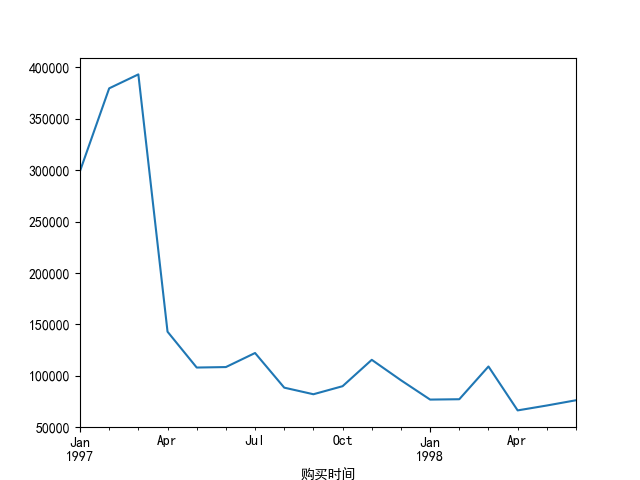

In [71]:
order_price=plt.figure()

In [72]:
temp=data.set_index('购买时间').resample('M').sum()

In [73]:
temp['商品单价'].plot()

异常值检测

<IPython.core.display.Javascript object>


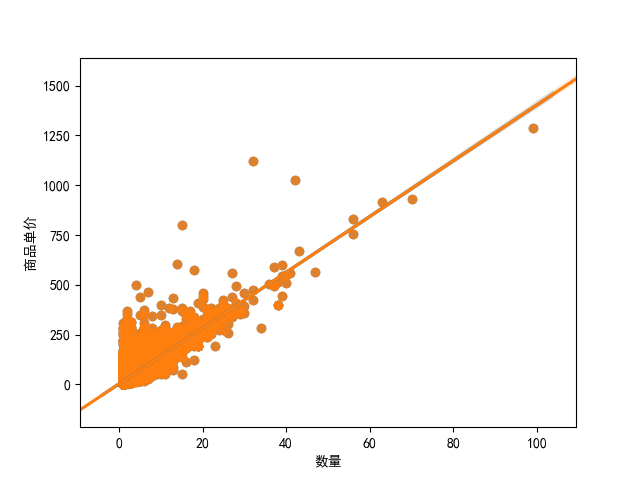

In [74]:
abnormal=plt.figure()

In [76]:
sns.regplot('数量','商品单价',data=data)

3. 用户消费行为静态分析

（1）各用户 购买数量分析

各用户 累积购买数量统计分析


In [31]:
user_sum=data.groupby('会员号').sum()
user_sum

,数量,商品单价
会员号,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61
6,1,20.99
7,18,264.67
8,18,197.66
9,6,95.85


In [32]:
user_sum.describe()

,数量,商品单价
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


各用户 累积购买数量分布


<IPython.core.display.Javascript object>


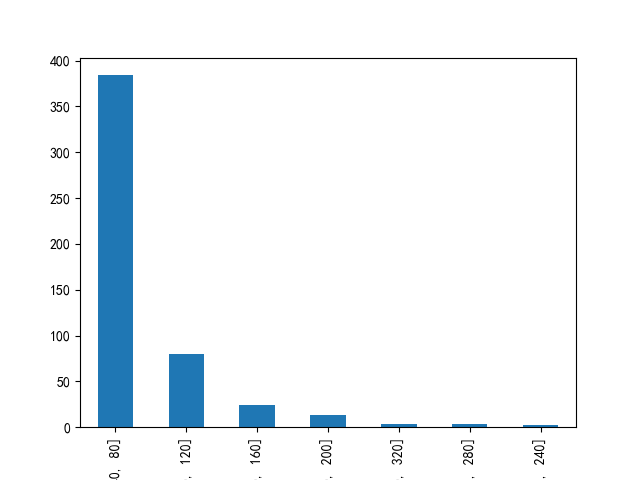

In [77]:
number=plt.figure()
sumnum=data.groupby('会员号')['数量'].sum()
bin_num=pd.cut(sumnum,[40,80,120,160,200,240,280,320])
pd.value_counts(bin_num).plot.bar()


各用户 购买数量累积贡献分析

<IPython.core.display.Javascript object>


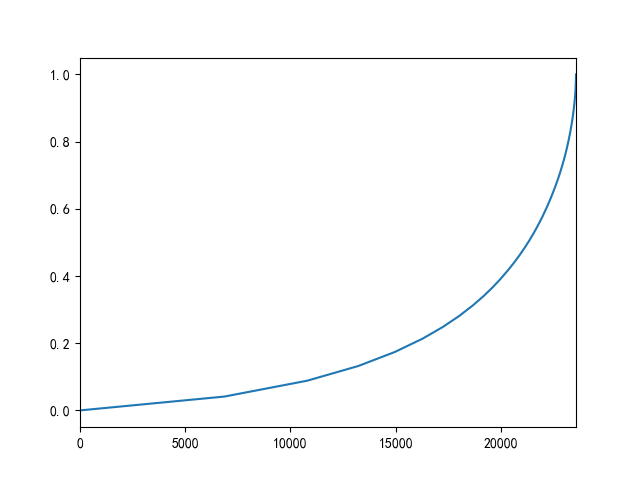

In [78]:
t=plt.figure()
cal=sumnum/(data['数量'].sum())
cal.sort_values().cumsum().reset_index(drop=True).plot()



各用户 最大单笔购买数量统计分析

In [35]:
aa=data.groupby('会员号')['数量'].max()
aa

会员号
1        1
2        5
3        5
4        2
5        4
6        1
7        9
8        7
9        2
10       3
        ..
23561    3
23562    2
23563    2
23564    3
23565    1
23566    2
23567    1
23568    4
23569    2
23570    3
Name: 数量, Length: 23570, dtype: int64

In [36]:
aa.describe()

count    23570.000000
mean         2.854391
std          2.944292
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: 数量, dtype: float64

（2）各用户 购买金额分析

In [37]:
cash_byid=data.groupby('会员号')['商品单价'].sum()
cash_byid

会员号
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
          ...  
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: 商品单价, Length: 23570, dtype: float64

In [38]:
cash_byid.describe()

count    23570.000000
mean       106.080426
std        240.925195
min          0.000000
25%         19.970000
50%         43.395000
75%        106.475000
max      13990.930000
Name: 商品单价, dtype: float64

各用户 购买金额分布


<IPython.core.display.Javascript object>


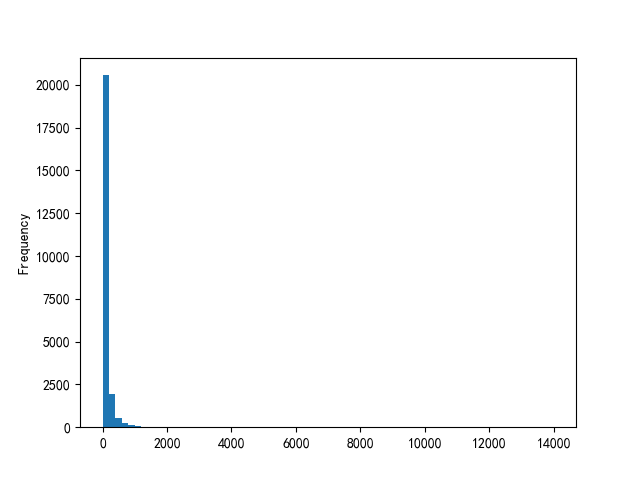

In [79]:
ass=plt.figure()
cash_byid.plot.hist(bins=70)


各用户 购买金额累积贡献分析

<IPython.core.display.Javascript object>


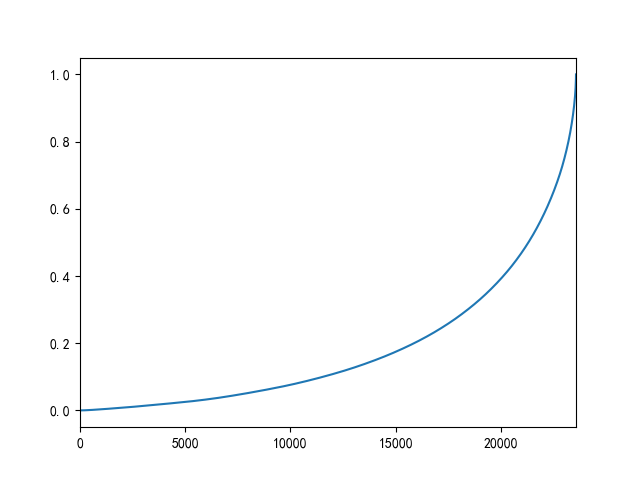

In [80]:
ts=plt.figure()
ca=cash_byid/(data['商品单价'].sum())
ca.sort_values().cumsum().reset_index(drop=True).plot()

各用户 最大单笔消费金额统计分析

In [41]:
aaa=data.groupby('会员号')['商品单价'].max()
aaa

会员号
1         11.77
2         77.00
3         57.45
4         29.73
5         46.46
6         20.99
7        138.50
8         50.43
9         41.98
10        39.31
          ...  
23561     37.05
23562     29.33
23563     47.98
23564     46.47
23565     11.77
23566     36.00
23567     20.97
23568     83.74
23569     25.74
23570     51.12
Name: 商品单价, Length: 23570, dtype: float64

In [42]:
aaa.describe()

count    23570.000000
mean        43.897931
std         46.153873
min          0.000000
25%         15.360000
50%         29.980000
75%         54.677500
max       1286.010000
Name: 商品单价, dtype: float64

各用户 购买次数分析

In [43]:
data.groupby('会员号').count().describe()

,购买时间,数量,商品单价
count,23570.000000,23570.000000,23570.000000
mean,2.955409,2.955409,2.955409
std,4.736558,4.736558,4.736558
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000
max,217.000000,217.000000,217.000000


4. 用户消费行为动态分析

（1）各用户 第一次购买时间分析

In [44]:
time=data.groupby('会员号')['购买时间'].min()
time

会员号
1       1997-01-01
2       1997-01-12
3       1997-01-02
4       1997-01-01
5       1997-01-01
6       1997-01-01
7       1997-01-01
8       1997-01-01
9       1997-01-01
10      1997-01-21
           ...    
23561   1997-03-25
23562   1997-03-25
23563   1997-03-25
23564   1997-03-25
23565   1997-03-25
23566   1997-03-25
23567   1997-03-25
23568   1997-03-25
23569   1997-03-25
23570   1997-03-25
Name: 购买时间, Length: 23570, dtype: datetime64[ns]

In [45]:
pd.Series(time.index.values, index=time.values).groupby(level=0).count()

1997-01-01    209
1997-01-02    241
1997-01-03    228
1997-01-04    174
1997-01-05    250
1997-01-06    261
1997-01-07    211
1997-01-08    213
1997-01-09    219
1997-01-10    217
             ... 
1997-03-16    299
1997-03-17    294
1997-03-18    294
1997-03-19    274
1997-03-20    271
1997-03-21    213
1997-03-22    250
1997-03-23    277
1997-03-24    263
1997-03-25    241
Length: 84, dtype: int64

（2）各用户 最后一次购买时间分析

In [46]:
time2=data.groupby('会员号')['购买时间'].max()
time2

会员号
1       1997-01-01
2       1997-01-12
3       1998-05-28
4       1997-12-12
5       1998-01-03
6       1997-01-01
7       1998-03-22
8       1998-03-29
9       1998-06-08
10      1997-01-21
           ...    
23561   1998-05-29
23562   1997-03-25
23563   1997-10-04
23564   1997-11-30
23565   1997-03-25
23566   1997-03-25
23567   1997-03-25
23568   1997-04-22
23569   1997-03-25
23570   1997-03-26
Name: 购买时间, Length: 23570, dtype: datetime64[ns]

In [47]:
pd.Series(time2.index.values, index=time2.values).groupby(level=0).count()

1997-01-01     95
1997-01-02    126
1997-01-03    121
1997-01-04     97
1997-01-05    130
1997-01-06    153
1997-01-07     94
1997-01-08    113
1997-01-09    122
1997-01-10    104
             ... 
1998-06-21     43
1998-06-22     49
1998-06-23     47
1998-06-24     37
1998-06-25     35
1998-06-26     40
1998-06-27     66
1998-06-28     48
1998-06-29     53
1998-06-30     55
Length: 546, dtype: int64

（3）各用户 最后(近)一次消费与当前时间间隔

把时间列中最大的日期作为当前时间（1998-06-30）进行分析

In [48]:
chan=DataFrame([time2]).T
chan['当前时间']=Series(len(time2))
chan

,购买时间,当前时间
会员号,,
1,1997-01-01,NaN
2,1997-01-12,NaN
3,1998-05-28,NaN
4,1997-12-12,NaN
5,1998-01-03,NaN
6,1997-01-01,NaN
7,1998-03-22,NaN
8,1998-03-29,NaN
9,1998-06-08,NaN


In [49]:
chan['当前时间'].replace(np.nan,'1998-06-30',inplace=True)
chan

,购买时间,当前时间
会员号,,
1,1997-01-01,1998-06-30
2,1997-01-12,1998-06-30
3,1998-05-28,1998-06-30
4,1997-12-12,1998-06-30
5,1998-01-03,1998-06-30
6,1997-01-01,1998-06-30
7,1998-03-22,1998-06-30
8,1998-03-29,1998-06-30
9,1998-06-08,1998-06-30


In [50]:
chan['当前时间']=pd.to_datetime(chan['当前时间'])

In [51]:
chan['时间差']=chan['当前时间']-chan['购买时间']
chan

,购买时间,当前时间,时间差
会员号,,,
1,1997-01-01,1998-06-30,545 days
2,1997-01-12,1998-06-30,534 days
3,1998-05-28,1998-06-30,33 days
4,1997-12-12,1998-06-30,200 days
5,1998-01-03,1998-06-30,178 days
6,1997-01-01,1998-06-30,545 days
7,1998-03-22,1998-06-30,100 days
8,1998-03-29,1998-06-30,93 days
9,1998-06-08,1998-06-30,22 days


In [52]:
chan['时间差'].describe()

count                       23570
mean     367 days 05:19:09.495120
std      181 days 05:04:05.698565
min               0 days 00:00:00
25%             207 days 00:00:00
50%             471 days 00:00:00
75%             505 days 00:00:00
max             545 days 00:00:00
Name: 时间差, dtype: object

（4）各用户 生命周期分析

In [53]:
deltaid=time2-time
deltaid

会员号
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
6         0 days
7       445 days
8       452 days
9       523 days
10        0 days
          ...   
23561   430 days
23562     0 days
23563   193 days
23564   250 days
23565     0 days
23566     0 days
23567     0 days
23568    28 days
23569     0 days
23570     1 days
Name: 购买时间, Length: 23570, dtype: timedelta64[ns]

In [54]:
deltaid.describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: 购买时间, dtype: object

（5）各用户 首次回购周期 (未完成)

In [55]:
data

,会员号,购买时间,数量,商品单价
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


In [56]:
data['购买时间'].groupby(data['会员号']).size()

会员号
1         1
2         2
3         6
4         4
5        11
6         1
7         3
8         8
9         3
10        1
         ..
23561     3
23562     1
23563     2
23564     3
23565     1
23566     1
23567     1
23568     3
23569     1
23570     2
Name: 购买时间, Length: 23570, dtype: int64

In [57]:
data.set_index(['会员号'])

,购买时间,数量,商品单价
会员号,,,
1,1997-01-01,1,11.77
2,1997-01-12,1,12.00
2,1997-01-12,5,77.00
3,1997-01-02,2,20.76
3,1997-03-30,2,20.76
3,1997-04-02,2,19.54
3,1997-11-15,5,57.45
3,1997-11-25,4,20.96
3,1998-05-28,1,16.99


（6）各用户 平均购买周期

In [58]:
deltaid.mean()

Timedelta('134 days 20:55:36.987696')

（7）各用户 各月复购率

In [97]:
newdata=pd.concat([data['会员号'],data['购买时间']],axis=1)
newdata['购买时间']=pd.to_datetime(newdata['购买时间'])
newdata

,会员号,购买时间
0,1,1997-01-01
1,2,1997-01-12
2,2,1997-01-12
3,3,1997-01-02
4,3,1997-03-30
5,3,1997-04-02
6,3,1997-11-15
7,3,1997-11-25
8,3,1998-05-28
9,4,1997-01-01


In [92]:
pd.crosstab(newdata['会员号'],newdata['购买时间'])

购买时间,1997-01-01 00:00:00,1997-01-02 00:00:00,1997-01-03 00:00:00,1997-01-04 00:00:00,1997-01-05 00:00:00,1997-01-06 00:00:00,1997-01-07 00:00:00,1997-01-08 00:00:00,1997-01-09 00:00:00,1997-01-10 00:00:00,...,1998-06-21 00:00:00,1998-06-22 00:00:00,1998-06-23 00:00:00,1998-06-24 00:00:00,1998-06-25 00:00:00,1998-06-26 00:00:00,1998-06-27 00:00:00,1998-06-28 00:00:00,1998-06-29 00:00:00,1998-06-30 00:00:00
会员号,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
return_byid

,会员号,购买时间
0,1,1997-01-01
1,2,1997-01-12
2,2,1997-01-12
3,3,1997-01-02
4,3,1997-03-30
5,3,1997-04-02
6,3,1997-11-15
7,3,1997-11-25
8,3,1998-05-28
9,4,1997-01-01


In [ ]:
还剩3个难的问题，努力解决中。要搜英文解决方法很慢